## Analysis of Palmer Penguins Data Set

##### Importing pandas to allow data manipulation and analysis
##### Importing numpy to allow for operations on arrays 

In [1]:
import pandas as pd
import numpy as np

##### Loading in the data set

In [30]:
#Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

##### Presenting an overview of the data set, including all variable names (in columns) and a selection of values (in rows)

In [31]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##### An overview of descriptive statistics for each scale (continuous) variable. This includes the count of values for each variable, the mean, standard deviation, minimum and maximum values, and the first, second, and third quartiles

In [4]:
#Describe the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##### An overview of categorical variables, and associated values and counts

In [42]:
un_species = df['species'].unique()
un_species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [43]:
species_counts = df["species"].value_counts()
species_counts

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [36]:
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [37]:
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [40]:
import matplotlib.pyplot as plt 

<BarContainer object of 3 artists>

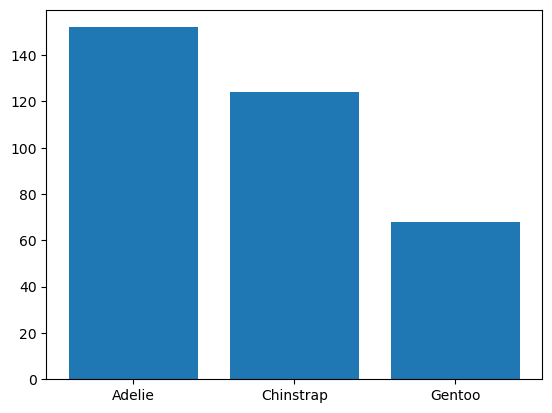

In [44]:
plt.bar(un_species, species_counts)

In [7]:
cat_array = df[['species', 'island', 'sex']].to_numpy()
print(cat_array)

[['Adelie' 'Torgersen' 'MALE']
 ['Adelie' 'Torgersen' 'FEMALE']
 ['Adelie' 'Torgersen' 'FEMALE']
 ...
 ['Gentoo' 'Biscoe' 'MALE']
 ['Gentoo' 'Biscoe' 'FEMALE']
 ['Gentoo' 'Biscoe' 'MALE']]


In [18]:
df2 = np.unique(df[['species', 'island', 'sex']].values)

TypeError: '<' not supported between instances of 'float' and 'str'

In [4]:
#Look  at the first row
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [5]:
#sex column
df["sex"]

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [6]:
#Count number of penguins each sex
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

***
### End 